In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from collections import Counter

def clean_range_of_one(date):
    if(date == '02-Jan'):
        return '1 - 2'
    elif(date == '03-Feb'):
        return '2 - 3'
    elif(date == '04-Mar'):
        return '3 - 4'
    elif(date == '05-Apr'):
        return '4 - 5'
    elif(date == '06-May'):
        return '5 - 6'
    elif(date == '07-Jun'): 
        return '6 - 7'
    elif(date == '08-Jul'):
        return '7 - 8'
    elif(date == '09-Aug'):
        return '8 - 9'
    elif(date == '10-Sep'):
        return '9 - 10'
    else:
        return date

def clean_range_of_one_applymap(df):
    df[[
        'Hours of Sleep per Night BQ',
        'Hours Spent Eating/Cooking per Day BQ',
        'Hours Spent Interneting per Day BQ',
        'Hours of Sleep per Night DQ',
        'Hours Spent Eating/Cooking per Day DQ',
        'Hours Spent Interneting per Day DQ'
    ]] = df[[
        'Hours of Sleep per Night BQ',
        'Hours Spent Eating/Cooking per Day BQ',
        'Hours Spent Interneting per Day BQ',
        'Hours of Sleep per Night DQ',
        'Hours Spent Eating/Cooking per Day DQ',
        'Hours Spent Interneting per Day DQ'
    ]].applymap(clean_range_of_one)
    return df

def clean_range_of_two(date):
    if(date == '04-Feb'):
        return '2 - 4'
    elif(date == '06-Apr'):
        return '4 - 6'
    elif(date == '08-Jun'):
        return '6 - 8'
    elif(date == '10-Aug'):
        return '8 - 10'
    else:
        return date

def clean_range_of_two_applymap(df):
    df[[
        'Hours Spent Outside Home per Day BQ',
        'Hours Spent Socializing per Day BQ',
        'Hours Spent Outside Home per Day DQ',
        'Hours Spent Socializing per Day DQ',
    ]] = df[[
        'Hours Spent Outside Home per Day BQ',
        'Hours Spent Socializing per Day BQ',
        'Hours Spent Outside Home per Day DQ',
        'Hours Spent Socializing per Day DQ',
    ]].applymap(clean_range_of_two)
    return df

def clean_range_of_four(date):
    if(date == '09-May'):
        return '5 - 9'
    elif (date == '14-Oct'):
        return '10 - 14'
    else:
        return date

def clean_range_of_four_applymap(df):
    df[[
        'Hours Spent Studying For SYDE 211',
        'Hours Spent Studying For SYDE 223',
        'Hours Spent Studying For SYDE 261',
        'Hours Spent Studying For SYDE 283',
        'Hours Spent Studying For SYDE 285',
        'Hours Spent Studying For Electives',
        'Hours Spent on SYDE 223 Practice Exercise 2',
        'Hours Spent on SYDE 261 Project 2',
        'Hours Spent on SYDE 261 Project 3',
        'Hours Spent on SYDE 285 Term Project'
    ]] = df[[
        'Hours Spent Studying For SYDE 211',
        'Hours Spent Studying For SYDE 223',
        'Hours Spent Studying For SYDE 261',
        'Hours Spent Studying For SYDE 283',
        'Hours Spent Studying For SYDE 285',
        'Hours Spent Studying For Electives',
        'Hours Spent on SYDE 223 Practice Exercise 2',
        'Hours Spent on SYDE 261 Project 2',
        'Hours Spent on SYDE 261 Project 3',
        'Hours Spent on SYDE 285 Term Project'
    ]].applymap(clean_range_of_four)
    return df

def execute_all_cleaning(df):
    df = clean_range_of_one_applymap(df)
    df = clean_range_of_two_applymap(df)
    df = clean_range_of_four_applymap(df)
    return df

df_dv_std = pd.read_csv('../PRIVATE-Covid-SYDE/csv/data_vis_std.csv')
df_dv_text = pd.read_csv('../PRIVATE-Covid-SYDE/csv/data_vis_text.csv')

df_dv_std = execute_all_cleaning(df_dv_std)
df_dv_text = execute_all_cleaning(df_dv_text)

In [21]:
def create_BQDQ_beside(
    df,
    column_name_BQ,
    column_name_DQ,
    x_axis_label,
    y_axis_label,
    title,
    vertical: bool,
    x_increment1 = None,
    x_increment2 = None,
    y_increment1 = None,
    y_increment2 = None,
    splice_required: bool = False,
    bar_values: list = [],
    colour_rotation: list = ['blue', 'red'],
):
    count1 = Counter()
    count2 = Counter()
    bar_width = 0.35
#     if(splice_required):
#         column_values = splice_cells_with_commas(df, column_name)
#     else:
#         column_values = df[column_name]

#     for value in column_values:
    ######################
    ## Count the amount of instances of each occurence in the dataset
    for value in df[column_name_BQ]:
        count1[value] += 1
    for value in df[column_name_DQ]:
        count2[value] += 1
    
    ######################
    ## Put the counted values into a new dataframe
    df_temp1 = pd.DataFrame({'title': list(count1.keys()), 'values': list(count1.values())})
    df_temp2 = pd.DataFrame({'title': list(count2.keys()), 'values': list(count2.values())})
    
    ######################
    ## Convert amount of people responded into percentages
    df_temp1['values'] = df_temp1['values'] / 49 * 100
    df_temp2['values'] = df_temp2['values'] / 49 * 100
    
#     if bar_values:
#         df_temp1.reindex(bar_values)
#         df_temp2.reindex(bar_values)

    fig, ax = plt.subplots(figsize = (11,9))

    ###################
    ## Set axis interval increments
#     if(not x_increment1):
#         x_increment1 = 1

#     if(not x_increment2):
#         x_increment2 = 1
    
    if(not y_increment1):
        y_increment1 = math.ceil(max(df_temp1['values']) / 10)

    if(not y_increment2):
        y_increment2 = math.ceil(max(df_temp1['values']) / 10)

    ##############
    ## create max value comparing all the graphs on the y axis, replace max(df_temp#['title/values']) ####
    
#     if(max(df_temp1['title']) < max(df_temp2['title'])):
#         x_max = max(df_temp2['title']) +1
#     else:
#         x_max = max(df_temp1['title']) +1
        
    if(max(df_temp1['values']) < max(df_temp2['values'])):
        y_max = max(df_temp2['values']) +1
    else:
        y_max = max(df_temp1['values']) +1
    
    if(vertical):
        ax.bar(
#             x = df_temp1['title'] - bar_width/2,
            x = np.arange(3) - bar_width/2,
            height = df_temp1['values'],
            align = 'center',
            zorder = 3,
            color = colour_rotation[0],
            label = column_name_BQ,
            alpha = 0.75,
            width = bar_width
        )
        ax.set_xlabel(x_axis_label)
        ax.set_ylabel(y_axis_label)
#         ax.xaxis.set_ticks(np.arange(0, x_max, x_increment1))
        ax.yaxis.set_ticks(np.arange(0, y_max, y_increment1))
    
        ax.bar(
#             x = df_temp2['title'] + bar_width/2,
            x = np.arange(3) + bar_width/2,
            height = df_temp2['values'],
            align = 'center',
            zorder = 3,
            color = colour_rotation[1],
            label = column_name_DQ,
            alpha = 0.75,
            width = bar_width
        )
        ax.set_xlabel(x_axis_label)
        ax.set_ylabel(y_axis_label)
#         ax.xaxis.set_ticks(np.arange(0, x_max, x_increment1))
        ax.yaxis.set_ticks(np.arange(0, y_max, y_increment1))

    else:
        ax.barh(
            # y = df_temp['title'],
            # width = df_temp['values'],
            align = 'center',
            zorder = 3,
            color = colour_rotation[0]
        )
        ax.set_xlabel(x_axis_label)
        ax.set_ylabel(y_axis_label)
#         ax.xaxis.set_ticks(np.arange(min(df_temp['title']), max(df_temp['title'])+1, 1.0))
#         ax.yaxis.set_ticks(np.arange(min(df_temp['values']), max(df_temp['values'])+1, 5.0))
    
    plt.rcParams['axes.facecolor'] = '#F0F0F0'
    ax.grid(color='w', linestyle='solid', zorder=0)
    plt.legend(title="Legend", facecolor='white')
    plt.title(title)
    global_styling()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

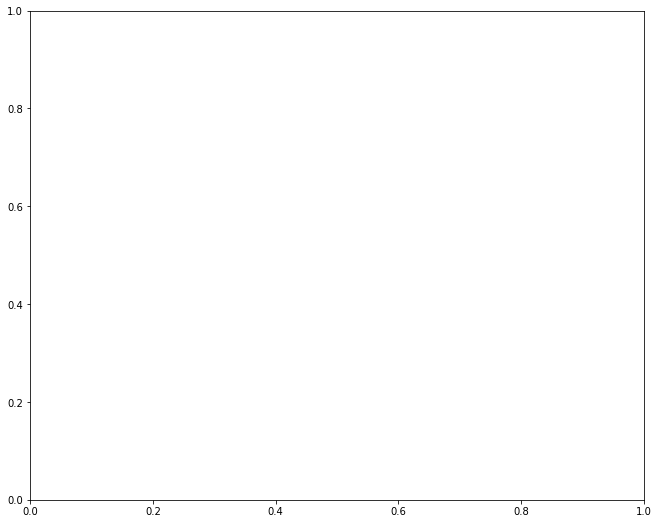

In [22]:
create_BQDQ_beside(df_dv_std, 'Side Projects BQ', 'Side Projects DQ', 'Amount of Side Projects', '% of Respondents', 'Side Projects', vertical=True, colour_rotation=['#fe5f55', '#087e8b'])